In [2]:
import nibabel as nib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from __future__ import division 
import os

/home/ernst/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
data_dir=u'/home/ernst/ETH-CAS/MachineLearning/Project1//'
train_dir=data_dir + u'/set_train//'
image_paths=[train_dir + img_name for img_name in os.listdir(train_dir) if img_name.endswith('.nii')]

#### Investigate the first image

In [4]:
img1=nib.load(image_paths[0])
img_data=img1.get_data()

In [5]:
print img1.shape 
print img1.get_data_dtype() 
#print img1.header
print img1.affine

(176, 208, 176, 1)
int16
[[  -1.     0.     0.    87.5]
 [   0.     1.     0.  -103.5]
 [   0.     0.     1.   -87.5]
 [   0.     0.     0.     1. ]]


176x208x176 pixels, 16 bit per pixel. An affine transformation matrix is defined (does not seem relevant for now)

In [6]:
from ipywidgets import widgets
from IPython import display

In [8]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 10)

In [20]:
class SliceShow(object):
    def __init__(self,img):
        ''' img should be a 3-d np array
        axis determines the direction of slicing'''
        self.img=img
    def launch(self):        
        plt.figure(0)
        self._create_axiswidget()
        self._create_slicewidget()

    def _create_axiswidget(self):
        self._axiswgt=widgets.Dropdown(description='axis',options=['0','1','2'])
        display.display(self._axiswgt)
        
        self._axiswgt.observe(self.show_slice)
        self.axis=int(self._axiswgt.value)
        
    def _create_slicewidget(self):
        max_val=self.img.shape[self.axis]
        self._slider=widgets.IntSlider(description='slice index', min=0,max=max_val-1)
        display.display(self._slider)
        self._slider.observe(self.show_slice)
        
    def show_slice(self,btn):
        #update the slicewidget max value
        max_val=self.img.shape[self.axis]
        self._slider.max=max_val-1
        self.axis=int(self._axiswgt.value)
        display.clear_output(wait=True)
        ax=plt.subplot(111)
        slice_val=self._slider.value
        if self.axis==0:
            #There must be a nicer way to program this. Quick-and-dirty solution
            ax.imshow(self.img[slice_val,:,:,0],cmap="gray")
        elif self.axis==1:
            ax.imshow(self.img[:,slice_val,:,0],cmap="gray")
        elif self.axis==2:            
            ax.imshow(self.img[:,:,slice_val,0],cmap="gray")
            
        plt.draw()

In [21]:
sc=SliceShow(img_data)

In [22]:
sc.img.shape

(176, 208, 176, 1)

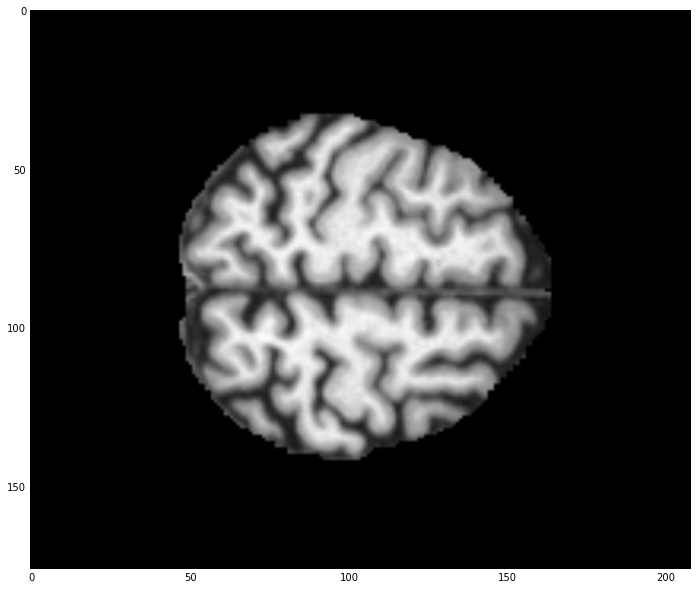

In [23]:
sc.launch()